<a href="https://colab.research.google.com/github/Afraj2004/Sales-And-Advertisement/blob/main/salesandadvertisementanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# PYTHON PROJECT - ANALYSIS ON ADVERTISEMENT VS SALES\n

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("/content/advertisement.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [36]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


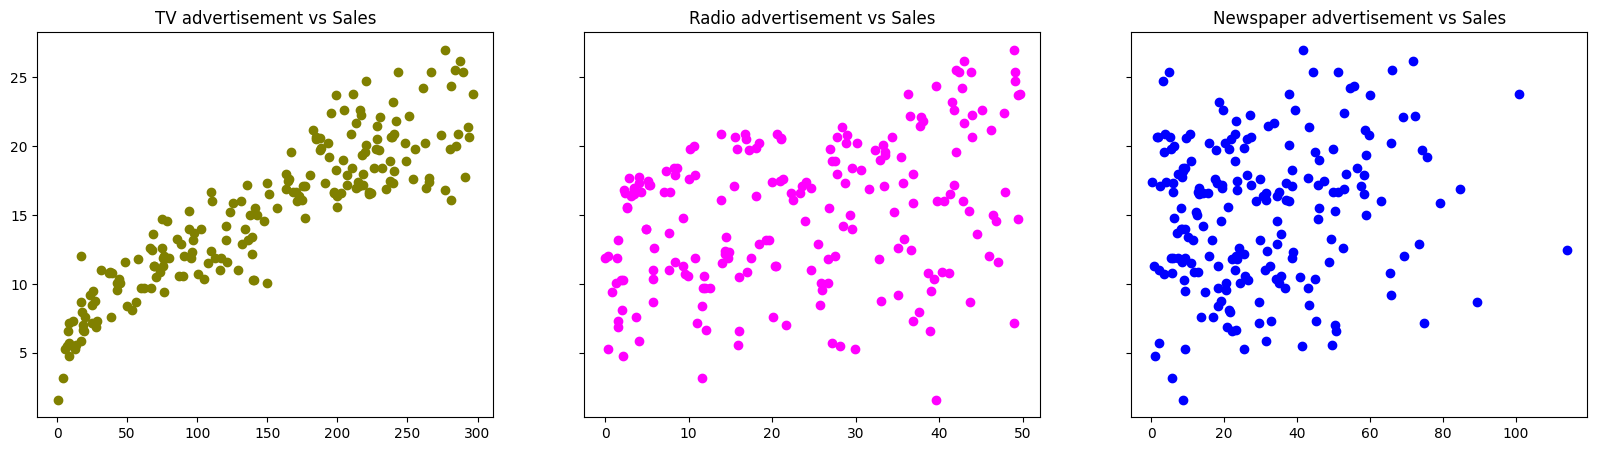

In [25]:

    f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(20,5));
    ax1.scatter(df['TV'],df['Sales'],color='olive');
    ax1.set_title("TV advertisement vs Sales");
    ax2.scatter(df['Radio'],df['Sales'],color='magenta');
    ax2.set_title("Radio advertisement vs Sales");
    ax3.scatter(df['Newspaper'],df['Sales'],color='blue');
    ax3.set_title("Newspaper advertisement vs Sales");
    plt.show();

In [37]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
y=df['Sales']
x=df.drop('Sales',axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled.shape

(200, 3)

In [28]:
## MULTIPLE REGRESSION

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [30]:
y_train_pred=lreg.predict(x_train)
y_test_pred=lreg.predict(x_test)
data=pd.DataFrame({'Predicted value':y_test_pred,'Actual Value':y_test})
data=df.reset_index(drop=True)

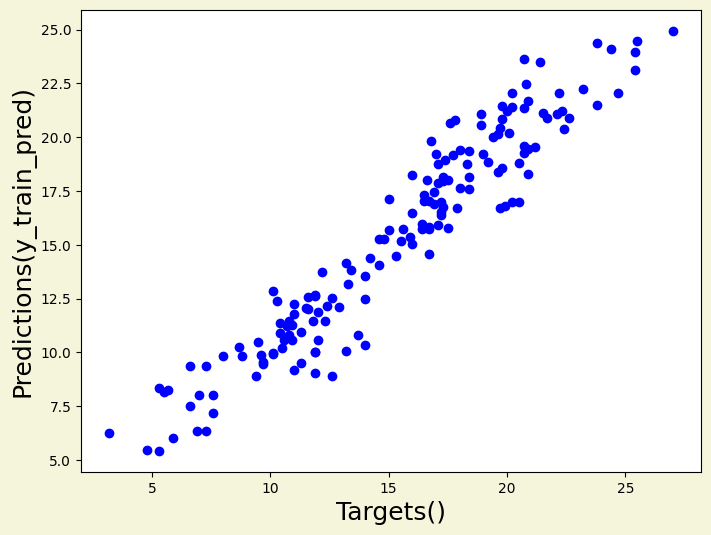

In [31]:
plt.figure(figsize=(8,6),facecolor='beige')
plt.scatter(y_train,y_train_pred,color='blue')
plt.plot()
plt.xlabel('Targets()',size=18)
plt.ylabel('Predictions(y_train_pred)',size=18)
plt.show()

In [32]:
### MODEL DO BE WORKING FINE CAUSE OF OBSERVED LINEARITY

In [33]:
print('Train Score: ', lreg.score(x_train, y_train))
print('Test Score: ', lreg.score(x_test, y_test))

Train Score:  0.9132130769530317
Test Score:  0.8645053923967725


In [38]:
results=pd.DataFrame({'Features':x.columns,'Weights':lreg.coef_})
results

,Features,Weights
0,TV,4.597124
1,Radio,1.651664
2,Newspaper,-0.076288


In [35]:
## BY WEIGHT IT CAN BE ESTABLISHED THAT INVESTING IN TV FOR ADVERTISEMENT IS BEST FOR GOOD SALES